In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import datetime
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

In [2]:
#read in the csv
jobs = pd.read_csv('../accre-candy-corn/accre-scheduler-data-2021/fullsample-corrected.csv')
#convert BEGIN date column to dtype datetime64[ns]
jobs['BEGIN'] = pd.to_datetime(jobs['BEGIN'], errors='coerce', infer_datetime_format = True)
#convert END date column to dtype datetime64[ns]
jobs['END'] = pd.to_datetime(jobs['END'], errors='coerce', infer_datetime_format = True)

#create a column for job length
jobs['JOBLENGTH'] = jobs['END'] - jobs['BEGIN']

In [4]:
#subset the df to be only jobs that are in the 'completed' state
completed_jobs = jobs[jobs['STATE']=='COMPLETED']

#sort by 'BEGIN' to remedy 'monotonic' error
completed_jobs = completed_jobs.sort_values('BEGIN')

#Rollup by different time spans, 1hr, 1Day, 1Week.
completed_jobs['ROLL1H'] = completed_jobs.rolling('1h', on = 'BEGIN')['JOBID'].count()
completed_jobs['ROLL1D'] = completed_jobs.rolling('1d', on = 'BEGIN')['JOBID'].count()
completed_jobs['ROLL1W'] = completed_jobs.rolling('7d', on = 'BEGIN')['JOBID'].count()


#extract day name, day # of month, and hour of day from the 'Begin' column. 
completed_jobs['Day'] = completed_jobs['BEGIN'].dt.day_name()
completed_jobs['Day of Month'] = completed_jobs['BEGIN'].dt.day
completed_jobs['Hour of Day'] = completed_jobs['BEGIN'].dt.hour

#add a column based on 'END' to see if it makes a difference. & Test column to see if using the 'End' or 'Begin' column makes a difference in analysis
completed_jobs['ROLL1HbyEND'] = completed_jobs.rolling('1h', on = 'END')['JOBID'].count()
completed_jobs['hour'] = completed_jobs['END'].dt.hour

#remove jobs that have a negative time delta
completed_jobs = completed_jobs[completed_jobs['JOBLENGTH'] >= '0 days 00:00:00']

#create a column of rollups divided by 1000 to make charts axises below easier to read.
completed_jobs['1000s'] = completed_jobs['ROLL1H']/1000

In [5]:
#create a df of failed jobs state to experiment with.
failed_jobs = jobs[jobs['STATE']=='FAILED']

failed_jobs = failed_jobs.sort_values('BEGIN')

failed_jobs['ROLL1H'] = failed_jobs.rolling('1h', on = 'BEGIN')['JOBID'].count()

failed_jobs['Day'] = failed_jobs['BEGIN'].dt.day_name()

failed_jobs['Day of Month'] = failed_jobs['BEGIN'].dt.day

failed_jobs['Hour of Day'] = failed_jobs['BEGIN'].dt.hour

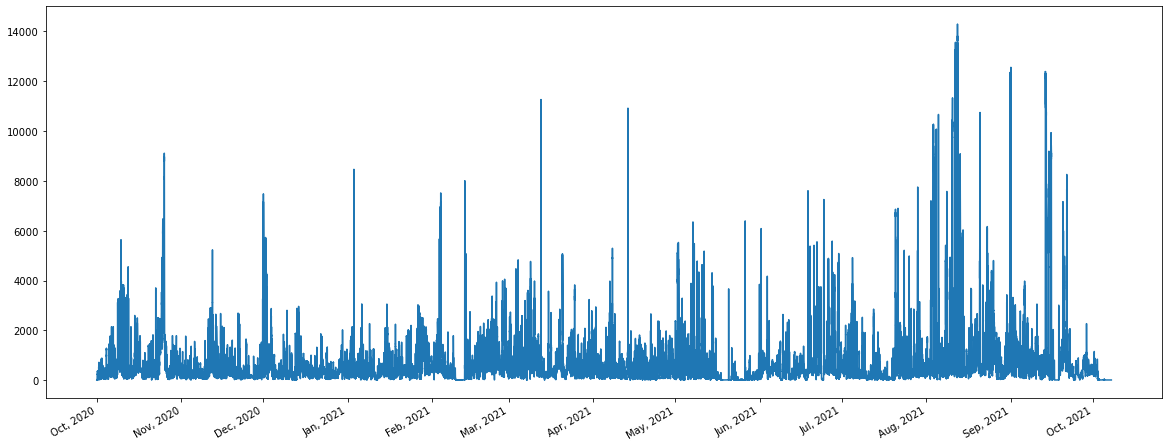

In [71]:
state = completed_jobs['BEGIN']
ROLL1H = completed_jobs['ROLL1H']
month_year_formatter = mdates.DateFormatter('%b, %Y') # The "," is intentional.
half_year_locator = mdates.MonthLocator(interval=1)
monthly_locator = mdates.MonthLocator()

fig, ax = plt.subplots(figsize=(20, 8))
monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(month_year_formatter)
ax.plot(state, ROLL1H)

fig.autofmt_xdate()
#try to color this by day of the week.

In [88]:
#create a list to order the seaborn charts below in a sensible order
order_day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
order_31 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
order_hr = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

In [101]:
#I got tired of copy pasting code to make different sns charts
def plotter(plottype, df, x, y, order):
    """Makes an seaborn cat plot that you pass to plottype with your df and x and y variables"""
    fontsize = 16
    plt.subplots(figsize = (14,6))
    plottype(data=df,
                  x = x,
                  y = y,
                  order = order)
    plt.tight_layout()
    plt.xticks(fontsize = fontsize,
               rotation = 45,
              fontweight = 'bold')

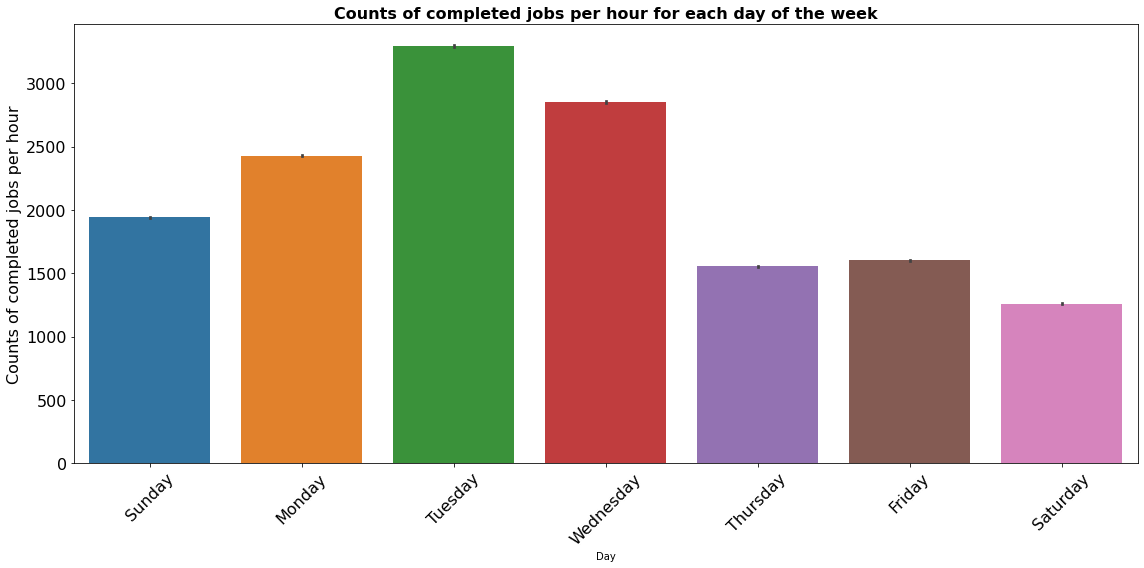

In [78]:
plotter(sns.barplot, completed_jobs, 'Day', 'ROLL1H', order_day)
plt.yticks(fontsize = fontsize)
plt.ylabel('Counts of completed jobs per hour', fontsize = fontsize)
plt.title('Counts of completed jobs per hour for each day of the week', fontsize = fontsize, fontweight = 'bold')
plt.tight_layout()
#plt.savefig('Barchart counts per hour by day of weekv2.jpeg', dpi = 600);


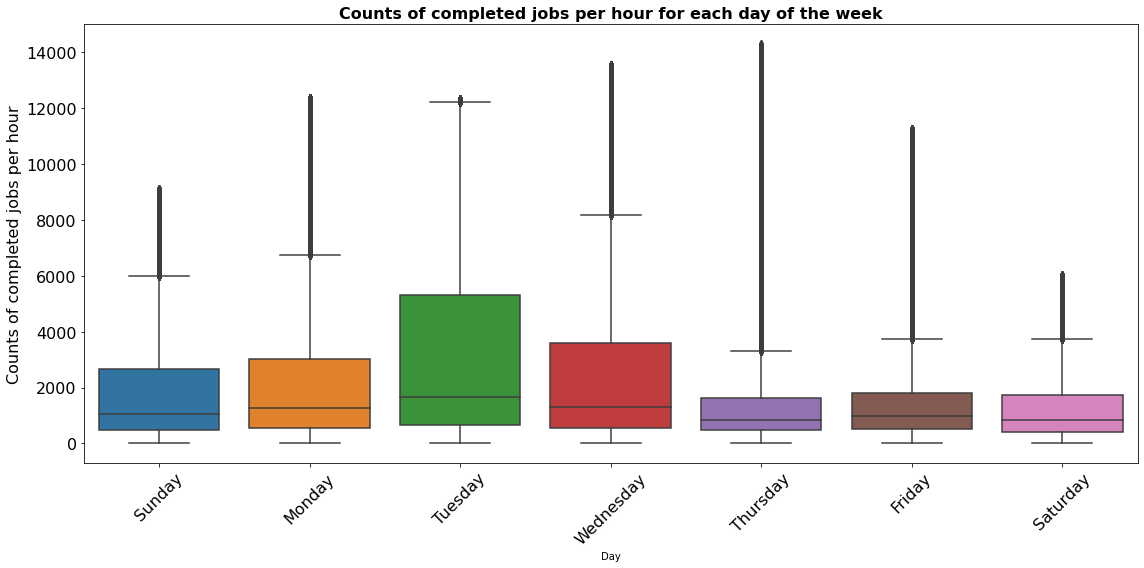

In [73]:
plotter(sns.boxplot, completed_jobs, 'Day', 'ROLL1H', order_day)
plt.yticks(fontsize = fontsize)
plt.ylabel('Counts of completed jobs per hour', fontsize = fontsize)
plt.title('Counts of completed jobs per hour for each day of the week', fontsize = fontsize, fontweight = 'bold')
plt.tight_layout()
#plt.savefig('boxplot counts per hour by day of weekv2.jpeg', dpi = 300);

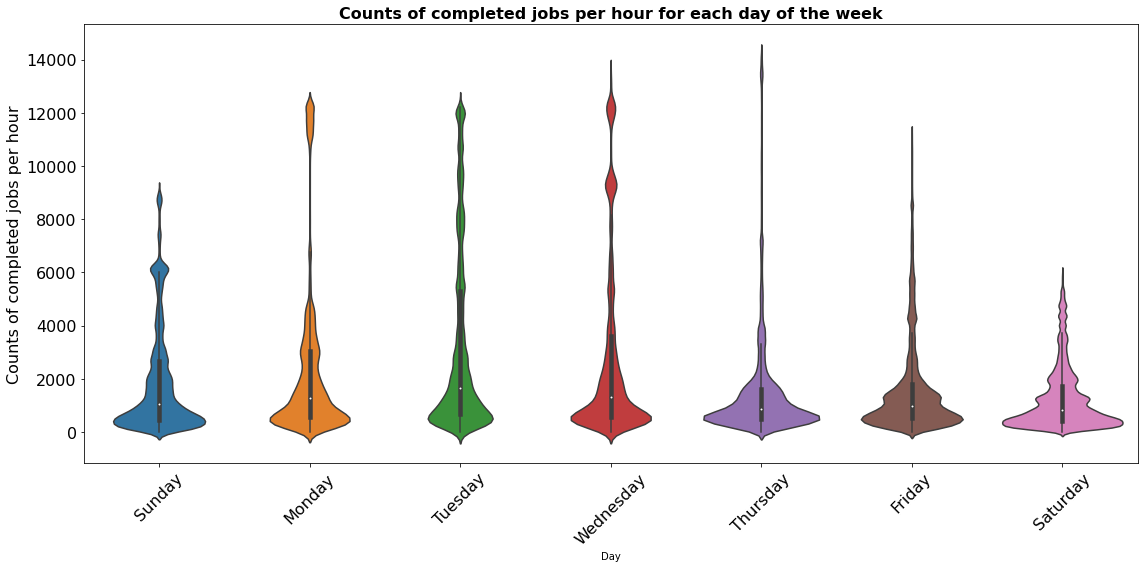

In [74]:
plotter(sns.violinplot, completed_jobs, 'Day', 'ROLL1H', order_day)
plt.yticks(fontsize = fontsize)
plt.ylabel('Counts of completed jobs per hour', fontsize = fontsize)
plt.title('Counts of completed jobs per hour for each day of the week', fontsize = fontsize, fontweight = 'bold')
plt.tight_layout()
#plt.savefig('violinplot counts per hour by day of weekv2.jpeg', dpi = 300);

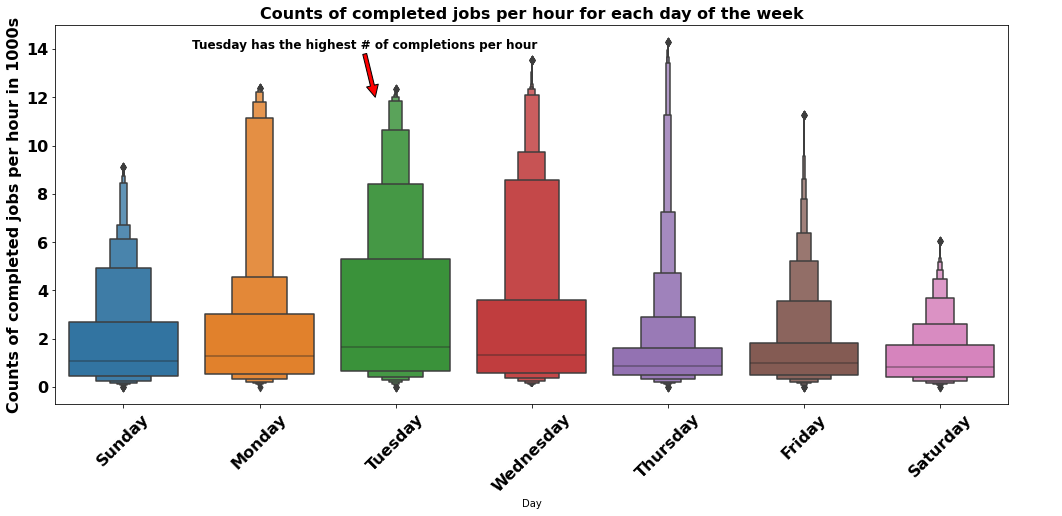

In [104]:
plotter(sns.boxenplot, completed_jobs, 'Day', '1000s', order_day)
plt.yticks(fontsize = fontsize,
           fontweight = 'bold')
plt.ylabel('Counts of completed jobs per hour in 1000s',
           fontsize = fontsize,
           fontweight = 'bold')
plt.title('Counts of completed jobs per hour for each day of the week',
          fontsize = fontsize,
          fontweight = 'bold')
plt.annotate(text = 'Tuesday has the highest # of completions per hour',
                 xy = (1.85, 12),
                 fontsize = 12,
                 xytext = (0.5, 14),
                 arrowprops=dict(facecolor='red'),
                 fontweight = 'bold')
plt.annotate(text = 'Saturday has the lowest # of Completions per hour',
                 xy = (6.85, 8),
                 fontsize = 12,
                 xytext = (0.5, 14),
                 arrowprops=dict(facecolor='red'),
                 fontweight = 'bold')
plt.savefig('boxenplot counts per hour by day of weekv4.jpeg', dpi = 300, bbox_inches="tight");

Text(4.5, 14, 'Saturday has the lowest # of completions per hour')

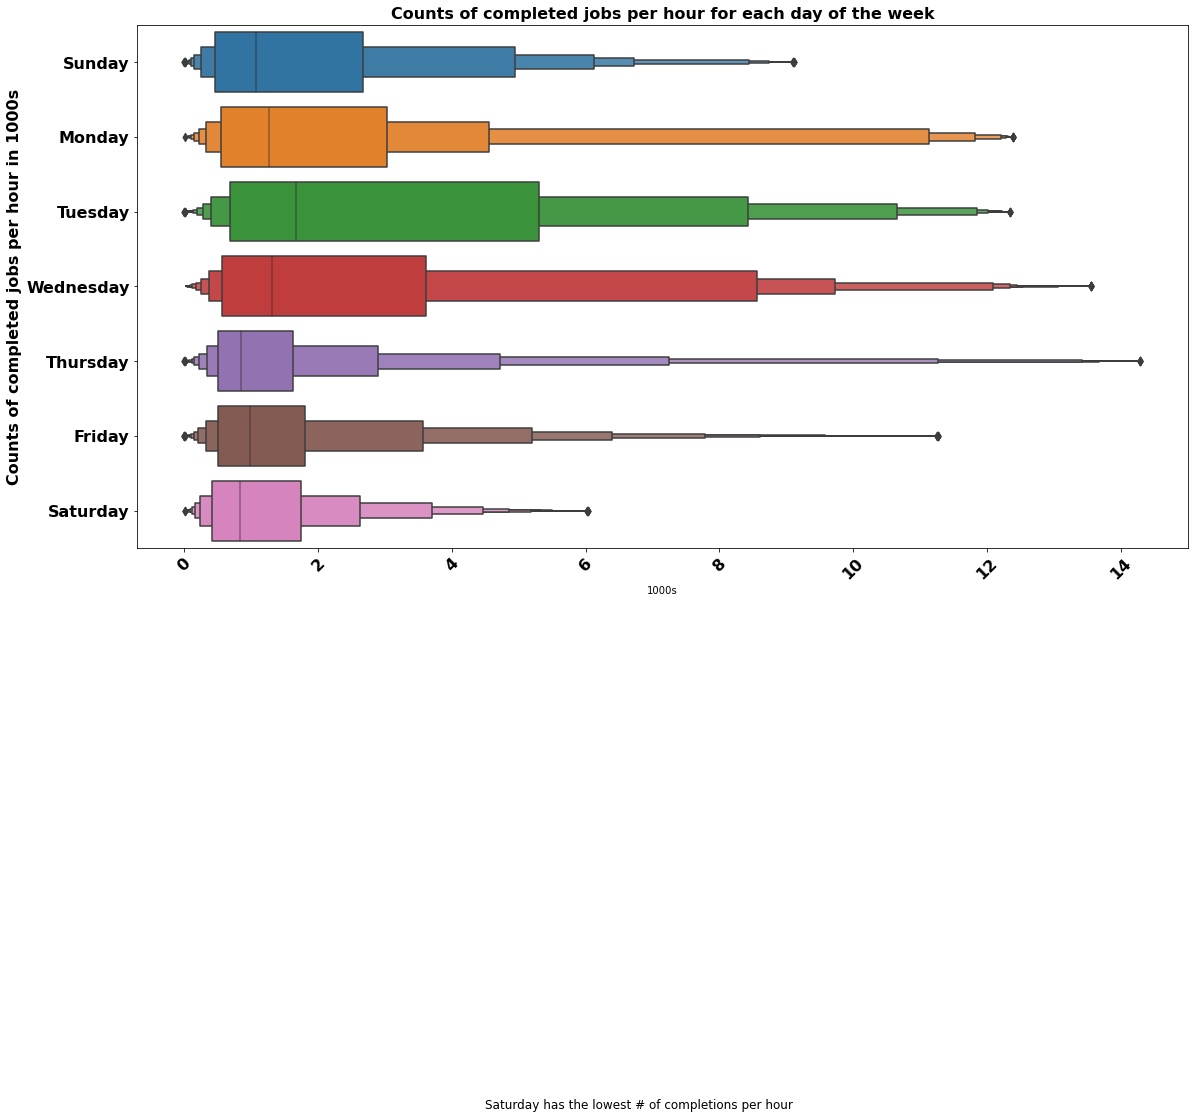

In [69]:
#experimenting with a different layout for the boxenplot
fontsize = 16
plt.subplots(figsize = (16,8))
sns.boxenplot(data=completed_jobs, 
              x = '1000s',
              y ='Day',
              order = order_day,
             orient = 'h')
plt.tight_layout()
plt.xticks(fontsize = fontsize,
           rotation = 45,
           fontweight = 'bold')
plt.yticks(fontsize = fontsize,
           fontweight = 'bold')
plt.ylabel('Counts of completed jobs per hour in 1000s',
           fontsize = fontsize,
           fontweight = 'bold')
plt.title('Counts of completed jobs per hour for each day of the week',
          fontsize = fontsize,
          fontweight = 'bold')

plt.annotate(text = 'Tuesday has the highest # of completions per hour',
             xy = (1.85, 12),
             fontsize = 12,
             xytext = (0.5, 14),
             arrowprops=dict(facecolor='red'),
             fontweight = 'bold')
plt.annotate(text = 'Saturday has the lowest # of Completions per hour',
             xy = (6.85, 8),
             fontsize = 12,
             xytext = (0.5, 14),
             arrowprops=dict(facecolor='red'))
plt.text(4.5,14, 'Saturday has the lowest # of completions per hour', fontsize = 12)
#plt.savefig('boxenplot counts per hour by day of weekv3.jpeg', dpi = 300);


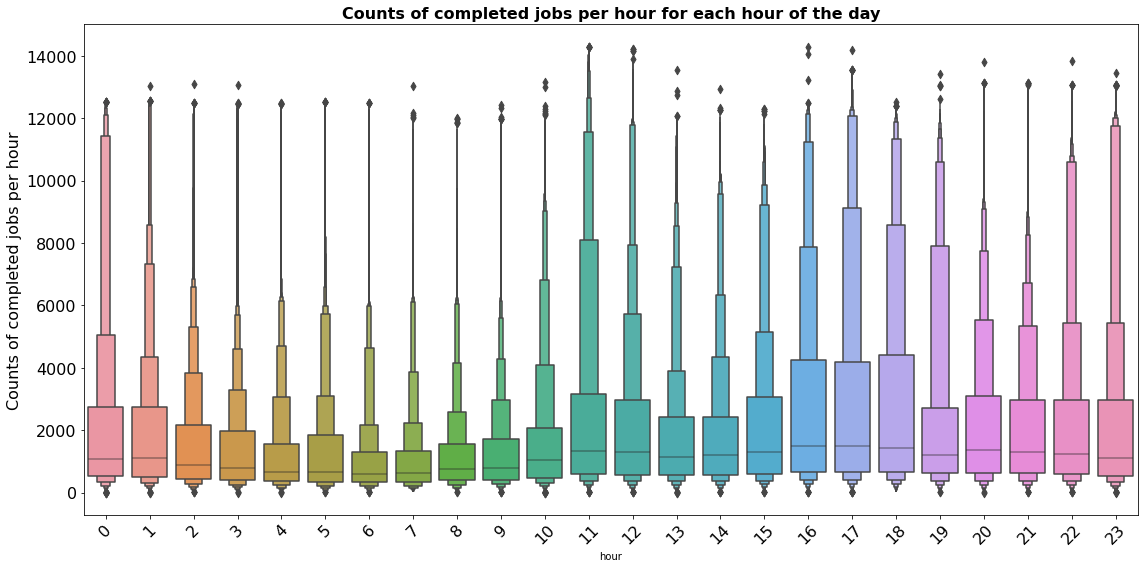

In [89]:

plotter(sns.boxenplot, completed_jobs, 'hour', 'ROLL1H', order_hr)
plt.yticks(fontsize = fontsize)
plt.ylabel('Counts of completed jobs per hour', fontsize = fontsize)
plt.title('Counts of completed jobs per hour for each hour of the day', fontsize = fontsize, fontweight = 'bold')
plt.tight_layout()
#plt.savefig('boxenplot counts per hour by hour of dayv1.jpeg', dpi = 300);

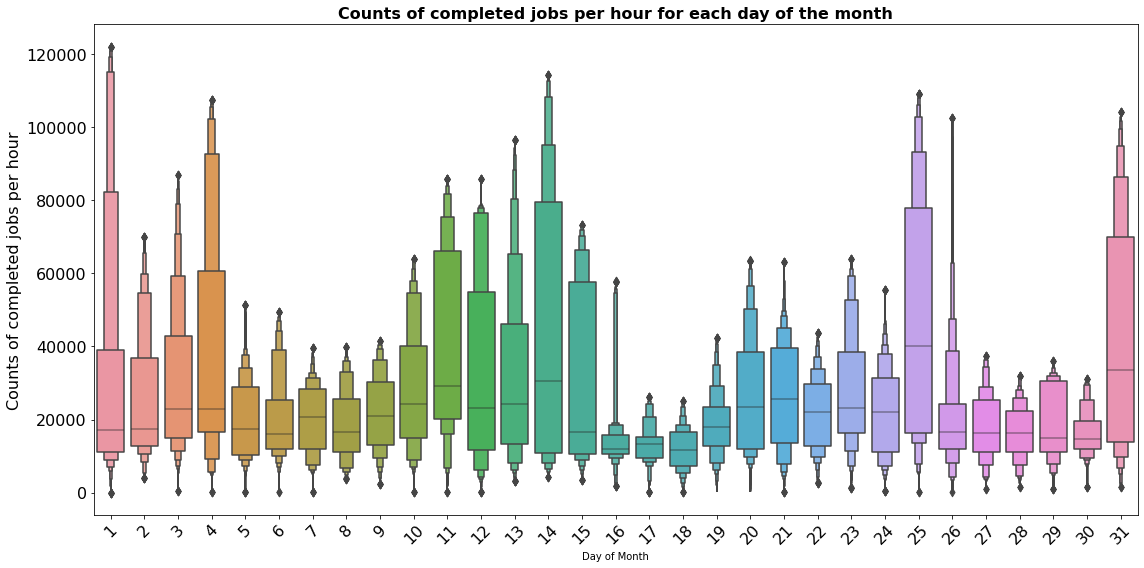

In [90]:
plotter(sns.boxenplot, completed_jobs, 'Day of Month', 'ROLL1D', order_31)
plt.yticks(fontsize = fontsize)
plt.ylabel('Counts of completed jobs per hour', fontsize = fontsize)
plt.title('Counts of completed jobs per hour for each day of the month', fontsize = fontsize, fontweight = 'bold')
plt.tight_layout()
#plt.annotate(text = '17th has the lowest # of Completions per hour', xy = (16, 40000), fontsize = 12,
            # xytext = (16.5, 120000), arrowprops=dict(facecolor='red'))
#plt.savefig('boxenplot counts per hour by day of month annotated.jpeg', dpi = 300);

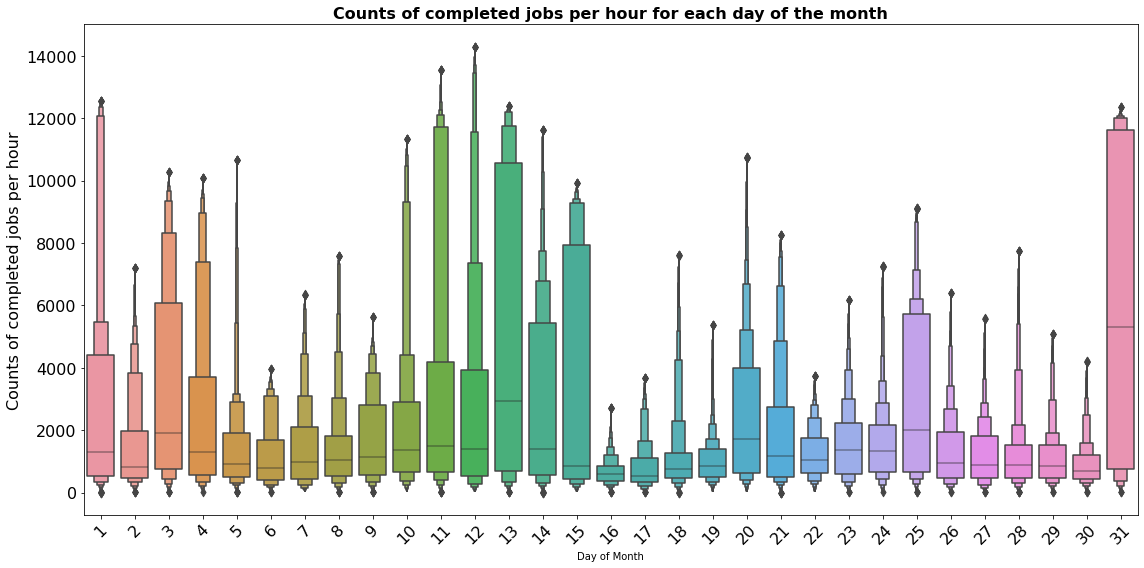

In [91]:
plotter(sns.boxenplot, completed_jobs, 'Day of Month', 'ROLL1H', order_31)
plt.xticks(fontsize = fontsize, rotation = 45)
plt.yticks(fontsize = fontsize)
plt.ylabel('Counts of completed jobs per hour', fontsize = fontsize)
plt.title('Counts of completed jobs per hour for each day of the month', fontsize = fontsize, fontweight = 'bold')
plt.tight_layout()
#plt.savefig('boxenplot counts per hour by day of month.jpeg', dpi = 300);

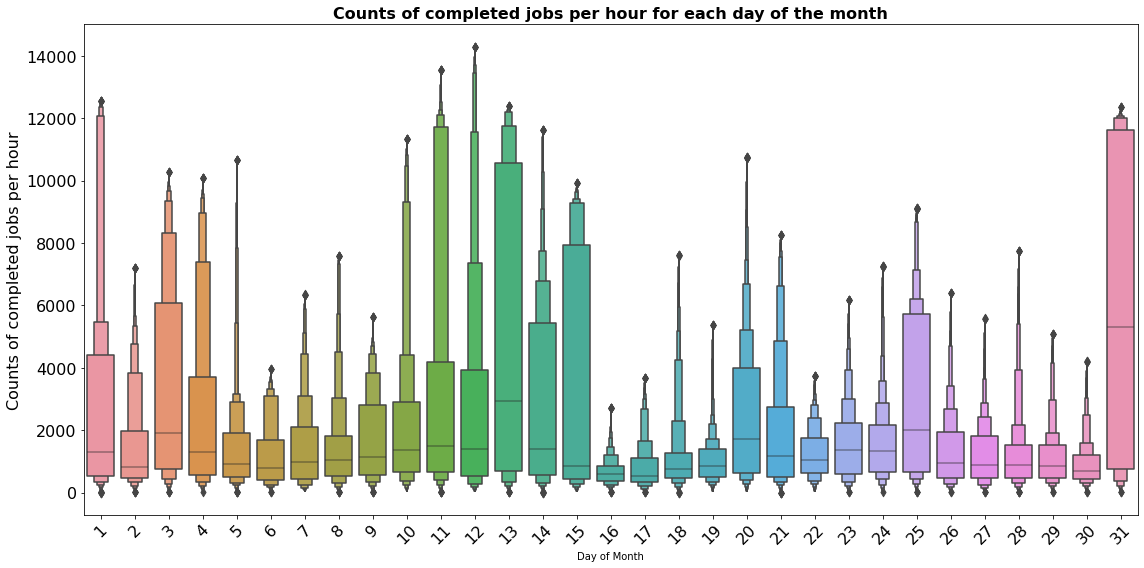

In [92]:
plotter(sns.boxenplot, completed_jobs, 'Day of Month', 'ROLL1HbyEND', order_31)
plt.xticks(fontsize = fontsize, rotation = 45)
plt.yticks(fontsize = fontsize)
plt.ylabel('Counts of completed jobs per hour', fontsize = fontsize)
plt.title('Counts of completed jobs per hour for each day of the month', fontsize = fontsize, fontweight = 'bold')
plt.tight_layout()
#plt.savefig('boxenplot counts per hour by day of month.jpeg', dpi = 300);

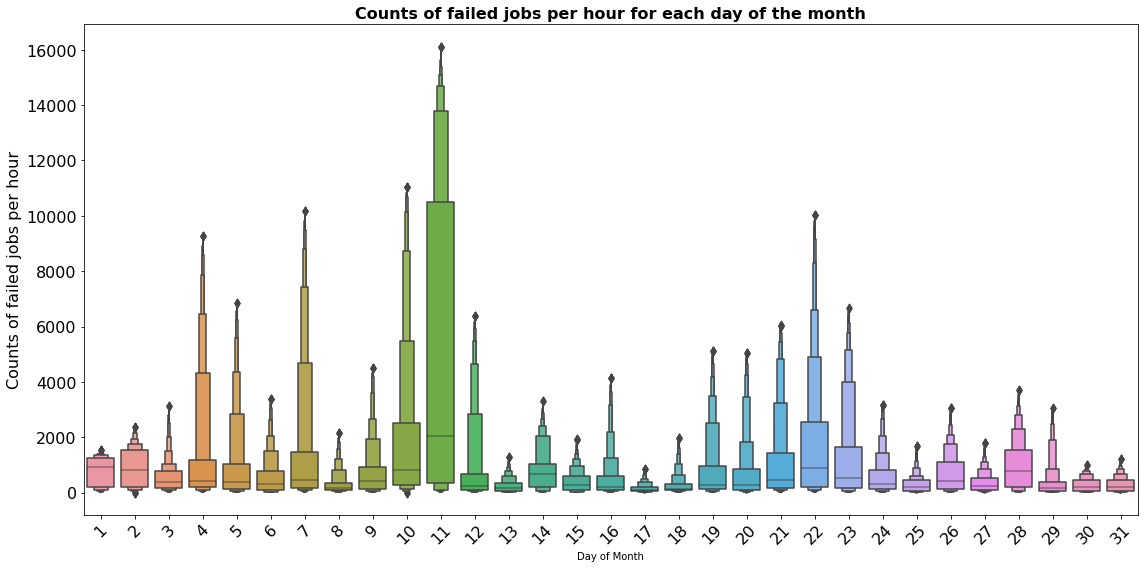

In [93]:
plotter(sns.boxenplot, failed_jobs, 'Day of Month', 'ROLL1H', order_31)
plt.xticks(fontsize = fontsize, rotation = 45)
plt.yticks(fontsize = fontsize)
plt.ylabel('Counts of failed jobs per hour', fontsize = fontsize)
plt.title('Counts of failed jobs per hour for each day of the month', fontsize = fontsize, fontweight = 'bold')
plt.tight_layout()
#plt.savefig('boxenplot counts per hour by day of month.jpeg', dpi = 300);

def single_plot(data, month, year, ax):
    data = completed_jobs[(completed_jobs["BEGIN"].dt.year == year) & (completed_jobs["BEGIN"].dt.month == month)]

    hour = completed_jobs["Hour of Day"]
    day = completed_jobs["Day of Month"]
    ROLL1H = completed_jobs["ROLL1H"]
    ROLL1H = ROLL1H.values.reshape(24, len(day.unique()), order="F")
    
    xgrid = np.arange(day.max() + 1) + 1
    ygrid = np.arange(25)
    
    ax.pcolormesh(xgrid, ygrid, ROLL1H, cmap="magma", vmin=MIN_Rate, vmax=MAX_Rate)
    # Invert the vertical axis
    ax.set_ylim(24, 0)
    # Set tick positions for both axes
    ax.yaxis.set_ticks([i for i in range(24)])
    ax.xaxis.set_ticks([10, 20, 30])
    # Remove ticks by setting their length to 0
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    # Remove all spines
    ax.set_frame_on(False)

fig, axes = plt.subplots(1, 12, figsize=(14, 10), sharey=True)

for i, year in enumerate([2020,2021]):
    for j, month in enumerate(range(1, 13)):
        single_plot(ROLL1H, month, year, axes[i])

# Adjust margin and space between subplots
# Extra space is on the left to add a label
fig.subplots_adjust(left=0.05, right=0.98, top=0.9, hspace=0.08, wspace=0.04)

In [18]:
ROLL1H

6640577    1.0
6640635    2.0
6640627    3.0
6640643    4.0
6640651    5.0
          ... 
927386     9.0
927387     9.0
927388     8.0
1491977    8.0
1491978    8.0
Name: ROLL1H, Length: 5871325, dtype: float64

<AxesSubplot:>

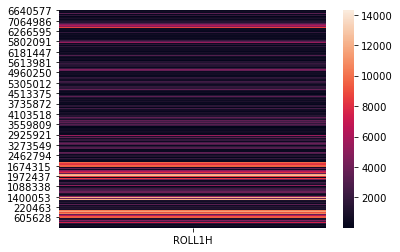

In [19]:
sns.heatmap(completed_jobs[['ROLL1H']],vmin=MIN_Rate,vmax=MAX_Rate)


# Subset data
subset = completed_jobs[(completed_jobs["BEGIN"].dt.year == 2021) & (completed_jobs["BEGIN"].dt.month == 1)]

# Extract hour, day, and temperature
hour = subset["Hour of Day"]
day = subset["Day of Month"]
temp = subset["ROLL1H"]

# Re-arrange temperature values
temp = temp.values.reshape(24, len(day.unique()), order="F")

# Compute x and y grids, passed to `ax.pcolormesh()`.

# The first + 1 increases the length
# The outer + 1 ensures days start at 1, and not at 0.
xgrid = np.arange(day.max() + 1) + 1

# Hours start at 0, length 2
ygrid = np.arange(25)


fig, ax = plt.subplots()
ax.pcolormesh(xgrid, ygrid, temp)
ax.set_frame_on(False) # remove all spines

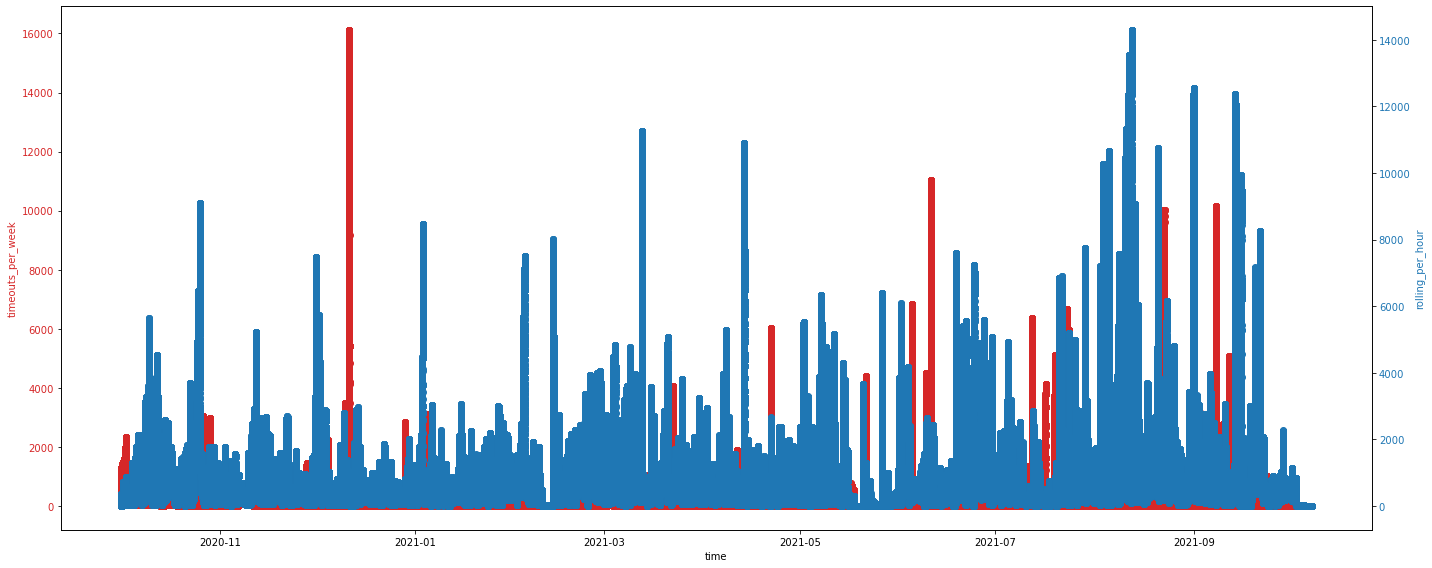

In [20]:
#timeouts_per_week plotted with completed_jobs per week
#https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/two_scales.html
fig, ax1 = plt.subplots(figsize = (20,8))

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('timeouts_per_week', color=color)
ax1.scatter(failed_jobs['BEGIN'], failed_jobs['ROLL1H'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rolling_per_hour', color=color)  # we already handled the x-label with ax1
ax2.scatter(completed_jobs['BEGIN'], completed_jobs['ROLL1H'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()# otherwise the right y-label is slightly clipped
plt.show()

#timeouts_per_DAY plotted with completed_jobs per DAY
#https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/two_scales.html
fig, ax1 = plt.subplots(figsize = (20,8))

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('timeouts_per_day', color=color)
ax1.lineplot(completed_jobs, logs['timeouts_per_day'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rolling_per_day', color=color)  # we already handled the x-label with ax1
ax2.lineplot(completed_jobs['BEGIN'], completed_jobs['ROLL1H'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()# otherwise the right y-label is slightly clipped
plt.show()

fig, (ax1,ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12) = plt.subplots(1,12, figsize=(20,8))

sns.lineplot(data = datachunk1_success_sort_aug.set_index('BEGIN')['rolling_1_hour_average'], 
               palette= ['blue'], ax=ax1)
ax1.title.set_text('Rolling Average by Hour August')


sns.lineplot(data = datachunk1_success_sort_sept.set_index('BEGIN')['rolling_1_hour_average'], 
            palette= ['blue'], ax=ax2)
ax2.title.set_text('Rolling Average by Hour September');

fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(20,8))

sns.lineplot(data = completed_jobs.set_index('BEGIN')['ROLL1H'], 
               palette= ['blue'], ax=ax1)
ax1.title.set_text('Rolling Average by Hour')


sns.lineplot(data = datachunk1_success_sort_sept.set_index('BEGIN')['rolling_1_hour_average'], 
            palette= ['blue'], ax=ax2)
ax2.title.set_text('Rolling Average by Hour September');

sns.lineplot(data = datachunk1_success_sort_oct.set_index('BEGIN')['rolling_1_hour_average'], 
            palette= ['blue'], ax=ax3)
ax3.title.set_text('Rolling Average by Hour October');